In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tflearn

# Load and Process the Data

In [2]:
data = np.loadtxt('data/data.csv', delimiter=',')

The last 13 rows of the data represent my output

In [3]:
X = np.transpose(data[:-13,:])
Y = np.transpose(data[-13:,:])

Every channel has a background of around ~150. We don't want to factor that in. Output should always be positive, so these have been scaled in the range $\left[0,1\right]$.

In [4]:
inscale = MinMaxScaler()
outscale = MinMaxScaler()

In [5]:
xs = inscale.fit_transform(X)
ys = outscale.fit_transform(Y)

Split the data into **train**, **test**, and **val**idation segments.

The data are in blocks of 20 measurements for each sample. Since the samples should be independent of each other, we can randomly select from each of the 7 samples. I have elected for a 70/15/15 train/test/validate split. 

In [6]:
# Choose 6 random numbers from 1-20.
c = np.random.choice(range(20), 6, replace=False)

# Make these the indexes we will use for our test/validation
while c.shape[0] <= (xs.shape[0] - 6) * 0.3:
    c = np.concatenate((c, c[-6:]+20))

In [7]:
xs_test = np.array([xs[i, :] for i in c[::2]])
ys_test = np.array([ys[i, :] for i in c[::2]])
xs_val = np.array([xs[i, :] for i in c[1::2]])
ys_val = np.array([ys[i, :] for i in c[1::2]])
xs_train = np.delete(xs, c, 0)
ys_train = np.delete(ys, c, 0)
print(xs_test.shape)
print(ys_test.shape)
print(xs_val.shape)
print(ys_val.shape)
print(xs_train.shape)
print(ys_train.shape)

(21, 11725)
(21, 13)
(21, 11725)
(21, 13)
(98, 11725)
(98, 13)


We now have 98 training records, 21 testing records, and 21 validation records. Each record is a vector of 11725 input values and 13 output values.

# Classifier

In [8]:
tf.__version__

'1.2.1'

In [9]:
from tflearn.datasets import titanic
titanic.download_dataset('titanic_dataset.csv')

'./titanic_dataset.csv'

In [10]:
from tflearn.data_utils import load_csv

In [11]:
data, labels = load_csv('data/tflearn_data.csv', target_column=0, categorical_labels=True, n_classes=7)

In [12]:
len(data[0])

11725

## Build a Deep Neural Network

In [13]:
net = tflearn.input_data(shape=[None, 11725])
net = tflearn.fully_connected(net, 20000)
net = tflearn.fully_connected(net, 20000)
net = tflearn.fully_connected(net, 20000)
net = tflearn.fully_connected(net, 20000)
net = tflearn.fully_connected(net, 20000)
net = tflearn.fully_connected(net, 7, activation='softmax')
net = tflearn.regression(net)

In [14]:
model = tflearn.DNN(net)
model.fit(data, labels, n_epoch=10, batch_size=16, show_metric=True)

Training Step: 89  | total loss: 19.74724 | time: 641.369s
| Adam | epoch: 010 | loss: 19.74724 - acc: 0.1424 -- iter: 128/140
Training Step: 90  | total loss: 19.49945 | time: 717.802s
| Adam | epoch: 010 | loss: 19.49945 - acc: 0.1531 -- iter: 140/140
--


In [23]:
model.predict_label(np.array(data)[:]).shape

(140, 7)

([array([ 140.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  140.]),
  array([ 140.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 140.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 140.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 140.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.]),
  array([ 140.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.])],
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 7 Lists of Patches objects>)

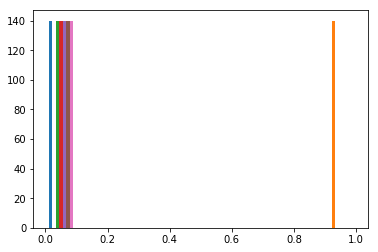

In [19]:
plt.hist(model.predict(np.array(data)))